In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, r2_score, accuracy_score, roc_curve, make_scorer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [428]:
patient=pd.read_csv("healthcare.csv")
patient

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [429]:
patient.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [430]:
patient.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [431]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [432]:
patient.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [433]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [434]:
len(patient['PatientId'].unique())


60270

Mean values of the attendance for each patientid,      1:attended all appointments , 0:for none 

In [435]:
attendance=patient.groupby('PatientId')['Showed_up'].mean()
attendance


PatientId
3.921784e+04    1.0
4.374176e+04    1.0
9.377953e+04    1.0
1.417242e+05    1.0
5.376153e+05    1.0
               ... 
9.999320e+14    1.0
9.999350e+14    1.0
9.999465e+14    1.0
9.999686e+14    1.0
9.999816e+14    1.0
Name: Showed_up, Length: 60270, dtype: float64

In [436]:
len(patient['AppointmentID'].unique())

106987

In [437]:
patient=patient.rename(columns={'Hipertension': "Hypertension",'Handcap': "Disabled"})

In [438]:
patient['ScheduledDay']=pd.to_datetime(patient['ScheduledDay'])
patient['AppointmentDay']=pd.to_datetime(patient['AppointmentDay'])


Exploratory Data Analysis

In [439]:
#AGE

print("Youngest patient age :",patient['Age'].min())
print("Oldest patient age :",patient['Age'].max())

Youngest patient age : 1
Oldest patient age : 115


In [440]:
#AGE greater then 100

#patient['Age'].unique()
patient.drop(patient[patient['Age']<100].index)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,Showed_up,Date.diff
56030,9.762948e+14,5651757,F,2016-05-03,2016-05-03,102,CONQUISTA,False,False,False,False,False,False,True,0
61803,3.196321e+13,5700278,F,2016-05-16,2016-05-19,115,ANDORINHAS,False,False,False,False,True,False,False,3
61806,3.196321e+13,5700279,F,2016-05-16,2016-05-19,115,ANDORINHAS,False,False,False,False,True,False,False,3
65876,3.196321e+13,5562812,F,2016-04-08,2016-05-16,115,ANDORINHAS,False,False,False,False,True,False,False,38
73825,3.196321e+13,5744037,F,2016-05-30,2016-05-30,115,ANDORINHAS,False,False,False,False,True,False,True,0
76684,9.739430e+12,5747809,M,2016-05-30,2016-05-31,100,TABUAZEIRO,False,False,False,False,True,False,True,1
76686,9.739430e+12,5747808,M,2016-05-30,2016-05-31,100,TABUAZEIRO,False,False,False,False,True,False,True,1
87422,2.342836e+11,5751563,F,2016-05-31,2016-06-02,102,MARIA ORTIZ,False,False,False,False,False,False,True,2
89091,5.578313e+13,5670914,F,2016-05-06,2016-06-03,100,ANTÔNIO HONÓRIO,False,False,False,False,False,True,True,28
94560,7.482346e+14,5717451,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,False,True,False,False,False,True,True,15


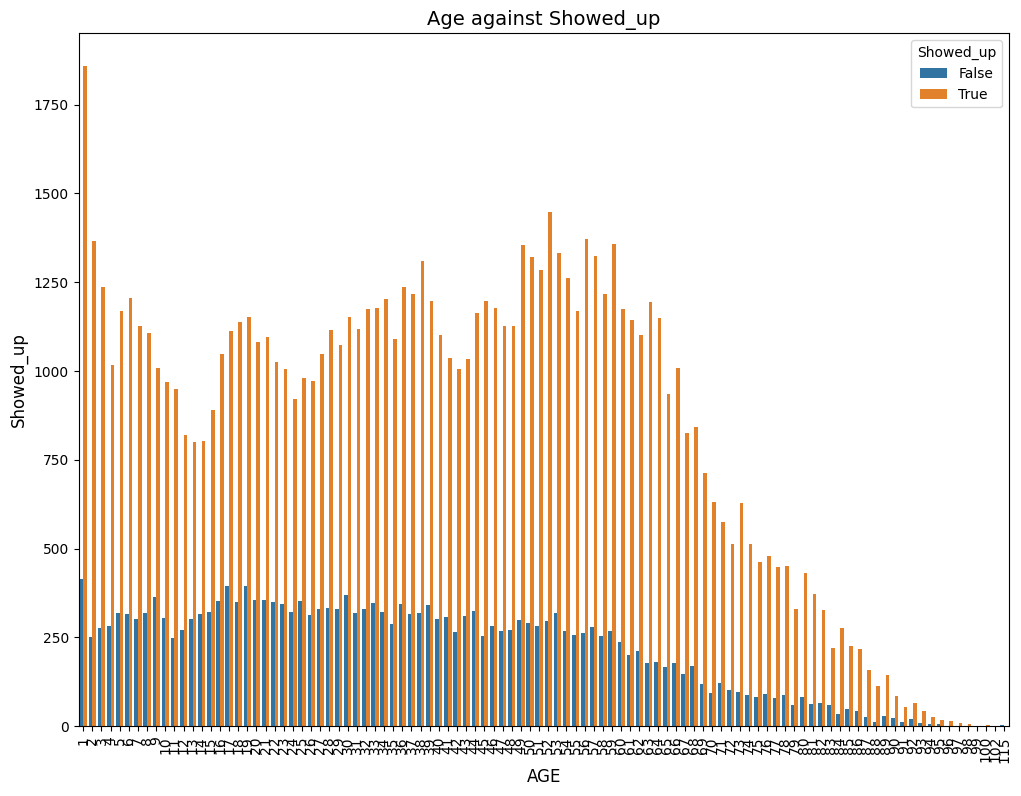

In [441]:
#Age & Showed_up
# graph shows per age, what is the total number of appointments showed up to and not showed up to
#age_sho=sns.countplot(x='Age',hue='Showed_up',data=patient)
#age_sho.set(ylabel="Showed_up",title="Age against Showed_up")

plt.figure(figsize=(12,9))
sns.countplot(x='Age',hue='Showed_up',data=patient)
plt.xlabel('AGE',fontsize=12)
plt.ylabel('Showed_up',fontsize=12)
plt.title('Age against Showed_up',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()







[Text(0, 0, '55843'), Text(0, 0, '29464')]

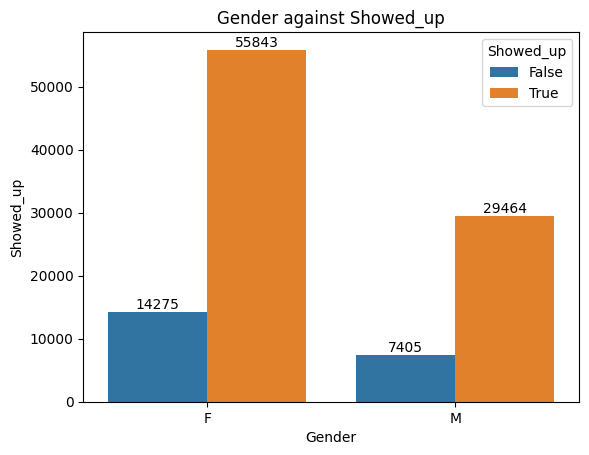

In [442]:
#Gender & Showed_up
gen_sho=sns.countplot(x='Gender',hue='Showed_up',data=patient)
gen_sho.set(ylabel="Showed_up",title="Gender against Showed_up")

gen_sho.bar_label(gen_sho.containers[0])
gen_sho.bar_label(gen_sho.containers[1])

In [443]:
patient['Gender'].value_counts()

Gender
F    70118
M    36869
Name: count, dtype: int64

[Text(0, 0, '77069'), Text(0, 0, '8238')]

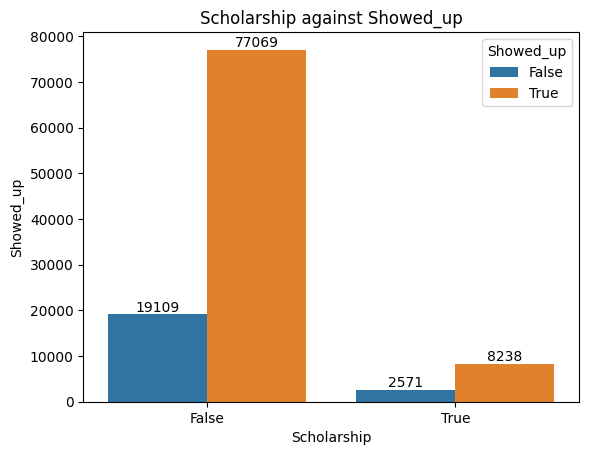

In [444]:
# Scholarship & Showed_up : True of False, indicates whether or not the patient is enrolled in some welfare program 
sch_sho=sns.countplot(x='Scholarship',hue='Showed_up',data=patient)
sch_sho.set(ylabel="Showed_up",title="Scholarship against Showed_up")

sch_sho.bar_label(sch_sho.containers[0])
sch_sho.bar_label(sch_sho.containers[1])

In [445]:
patient['Scholarship'].value_counts()

Scholarship
False    96178
True     10809
Name: count, dtype: int64

[Text(0, 0, '67278'), Text(0, 0, '18029')]

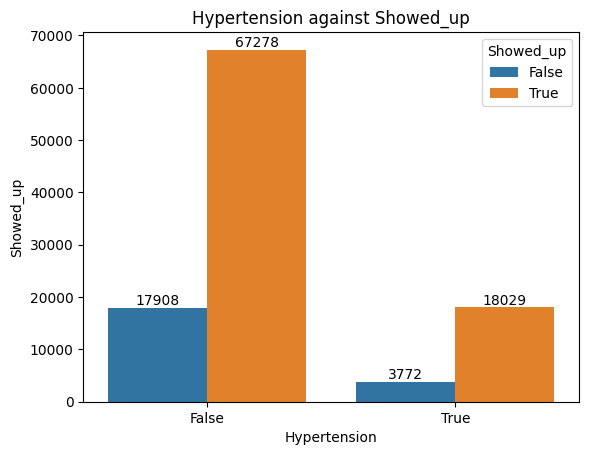

In [446]:
# Hypertension & Showed_up
hyp_sho=sns.countplot(x='Hypertension',hue='Showed_up',data=patient)
hyp_sho.set(ylabel="Showed_up",title="Hypertension against Showed_up")

hyp_sho.bar_label(hyp_sho.containers[0])
hyp_sho.bar_label(hyp_sho.containers[1])

In [447]:
patient['Hypertension'].value_counts()

Hypertension
False    85186
True     21801
Name: count, dtype: int64

[Text(0, 0, '78794'), Text(0, 0, '6513')]

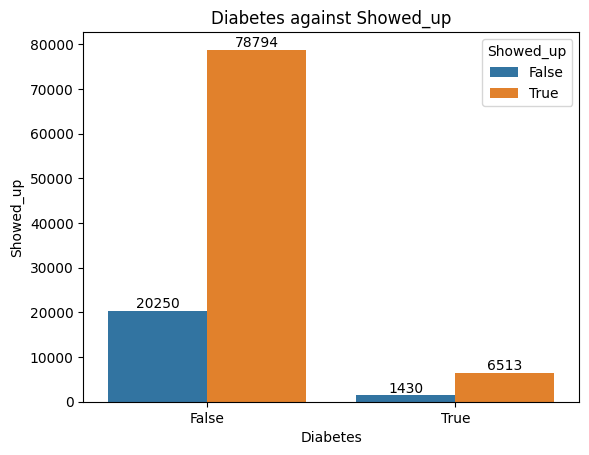

In [448]:
# Diabetes & Showed_up
dia_sho=sns.countplot(x='Diabetes',hue='Showed_up',data=patient)
dia_sho.set(ylabel="Showed_up",title="Diabetes against Showed_up")

dia_sho.bar_label(dia_sho.containers[0])
dia_sho.bar_label(dia_sho.containers[1])

In [449]:
patient['Diabetes'].value_counts()

Diabetes
False    99044
True      7943
Name: count, dtype: int64

[Text(0, 0, '82624'), Text(0, 0, '2683')]

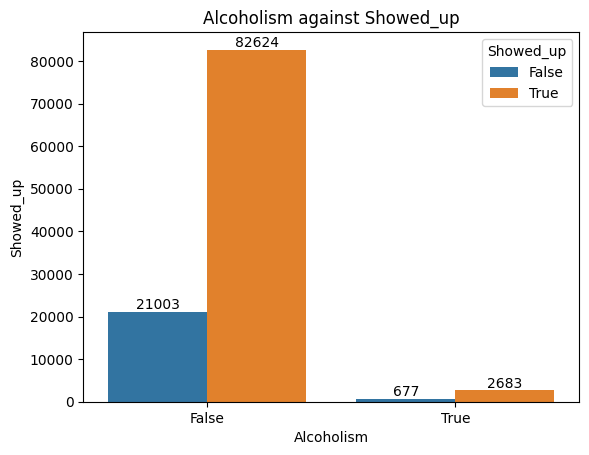

In [450]:
# Alcoholism & Showed_up
alc_sho=sns.countplot(x='Alcoholism',hue='Showed_up',data=patient)
alc_sho.set(ylabel="Showed_up",title="Alcoholism against Showed_up")

alc_sho.bar_label(alc_sho.containers[0])
alc_sho.bar_label(alc_sho.containers[1])

In [451]:
patient['Alcoholism'].value_counts()

Alcoholism
False    103627
True       3360
Name: count, dtype: int64

[Text(0, 0, '83474'), Text(0, 0, '1833')]

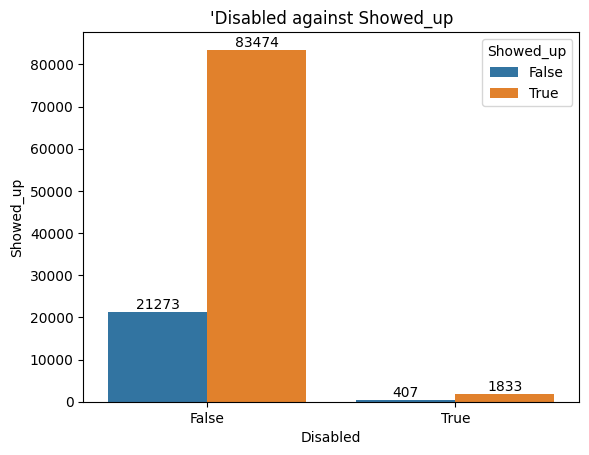

In [452]:
# Disabled & Showed_up
dis_sho=sns.countplot(x='Disabled',hue='Showed_up',data=patient)

dis_sho.set(ylabel="Showed_up",title="'Disabled against Showed_up")
dis_sho.bar_label(dis_sho.containers[0])
dis_sho.bar_label(dis_sho.containers[1])

In [453]:
patient['Disabled'].value_counts()

Disabled
False    104747
True       2240
Name: count, dtype: int64

[Text(0, 0, '60290'), Text(0, 0, '25017')]

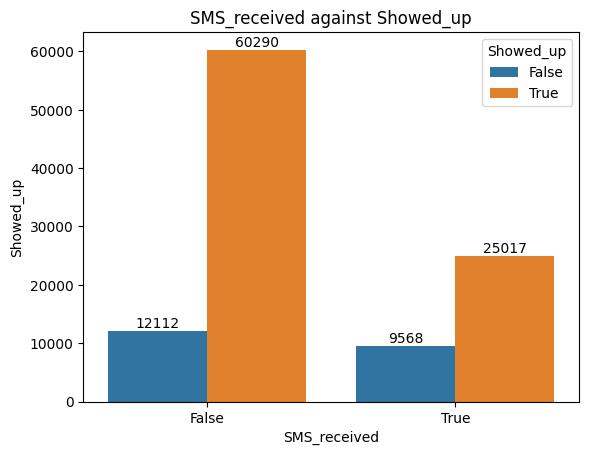

In [454]:
# SMS_received & Showed_up
sms_rec=sns.countplot(x='SMS_received',hue='Showed_up',data=patient)
sms_rec.set(ylabel="Showed_up",title="SMS_received against Showed_up")

sms_rec.bar_label(sms_rec.containers[0])
sms_rec.bar_label(sms_rec.containers[1])

In [455]:
patient['SMS_received'].value_counts()

SMS_received
False    72402
True     34585
Name: count, dtype: int64

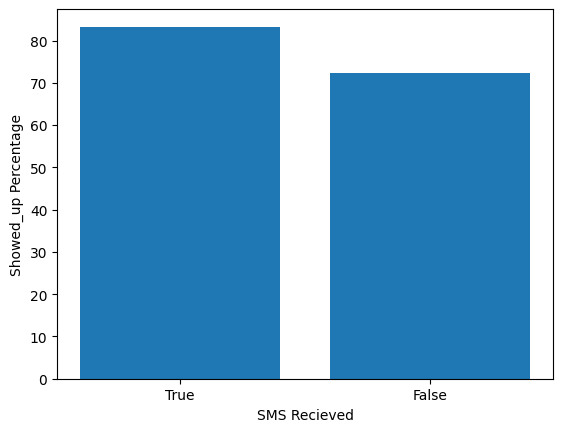

In [456]:
#Showed_up Percentage plot against SMS_received  
a=sms_rec.containers[1].datavalues
b=sms_rec.containers[0].datavalues
perc=np.divide(a,b)
perc=list(map(lambda x:100- 100/(x+1),perc))
perc
pp=plt.bar(['True','False'],perc)
plt.xlabel('SMS Recieved')
plt.ylabel('Showed_up Percentage')
plt.show()






In [457]:
#Date Difference between Schedule day and Appointment day 
patient['Date.diff'].unique()
print("Minimum Date difference between Schedule day and Appointment day ",patient['Date.diff'].min())
print("Maximum Date difference between Schedule day and Appointment day  :",patient['Date.diff'].max())

Minimum Date difference between Schedule day and Appointment day  -6
Maximum Date difference between Schedule day and Appointment day  : 179


In [458]:
#Date Difference between Schedule day and Appointment day
patient['Date.diff'].unique()


array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        73,  64,  20,  49,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  77,
        69,  76,  89,  81,  79,  54,  68,  75,  85, 112,  -1,  80,  86,
        98,  94,  83, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 103, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

[Text(0, 0.5, 'Showed_up'), Text(0.5, 1.0, 'Date.diff against Showed_up')]

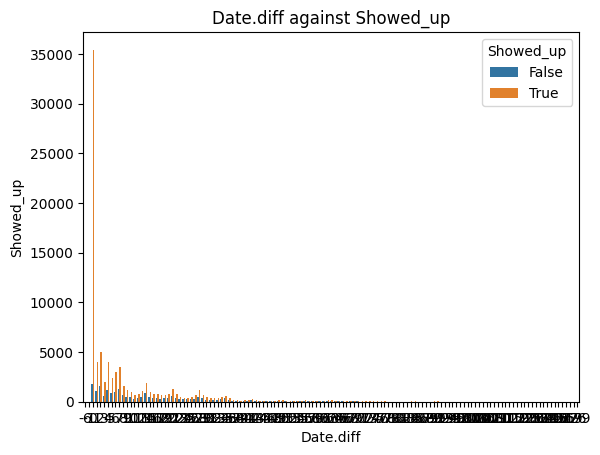

In [459]:
# Date.diff & Showed_up
#sns.countplot(x='Date.diff',hue='Showed_up',data=patient)
date_sho=sns.countplot(x='Date.diff',hue='Showed_up',data=patient)
date_sho.set(ylabel="Showed_up",title="Date.diff against Showed_up")




Droping the outlier datapoints

In [460]:
patient=patient.drop(patient[patient['Date.diff']<0].index)
#patient=patient[patient.Date.diff > 0]
patient
print("Minimum Date difference between Schedule day and Appointment day ",patient['Date.diff'].min())
print("Maximum Date difference between Schedule day and Appointment day  :",patient['Date.diff'].max())

Minimum Date difference between Schedule day and Appointment day  0
Maximum Date difference between Schedule day and Appointment day  : 179


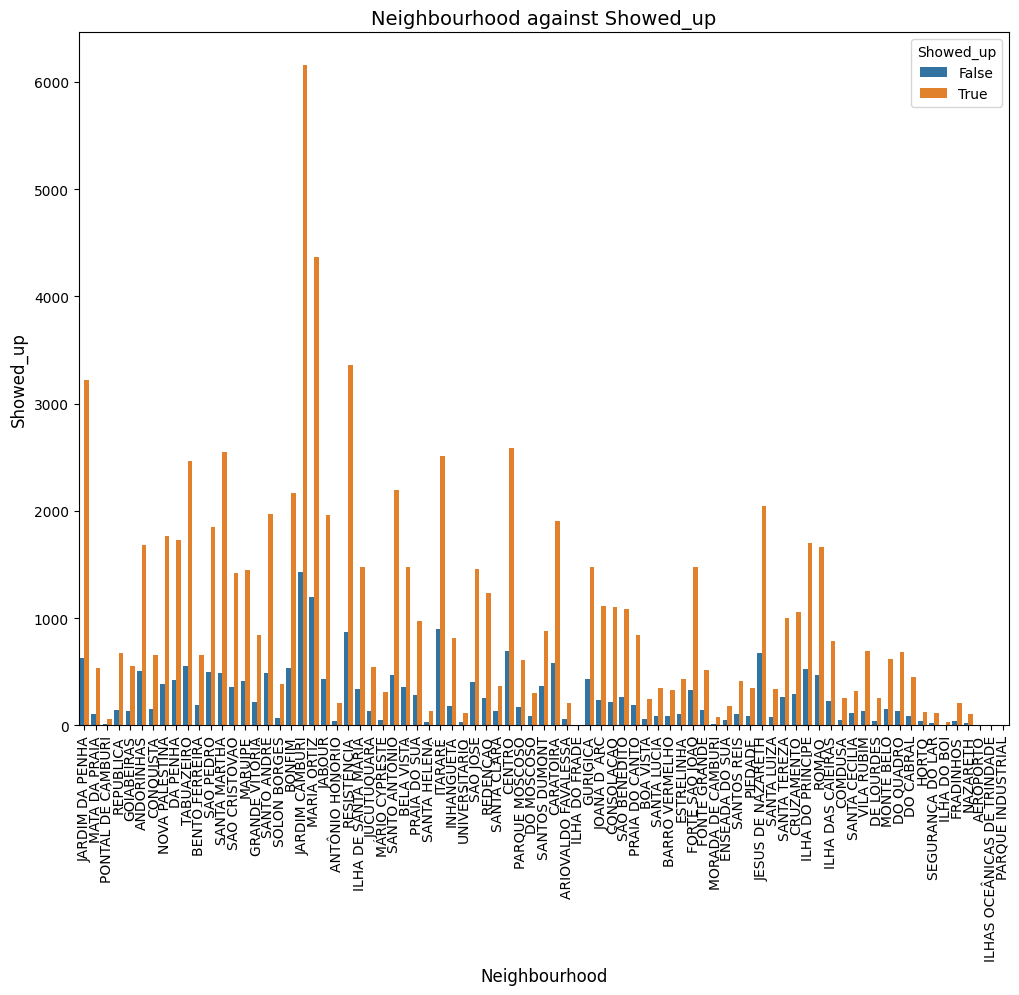

In [461]:
# Neighbourhood & Showed_up

plt.figure(figsize=(12,9))
sns.countplot(x='Neighbourhood',hue='Showed_up',data=patient)
plt.xlabel('Neighbourhood',fontsize=12)
plt.ylabel('Showed_up',fontsize=12)
plt.title('Neighbourhood against Showed_up',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

In [462]:
patient['Neighbourhood'].value_counts()

Neighbourhood
JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4234
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

Converting categorical Diagnoses data to numeric

True=1 False=0

In [463]:
patient["Scholarship"]=list(map(int,patient["Scholarship"]))
patient["Hypertension"]=list(map(int,patient["Hypertension"]))
patient["Diabetes"]=list(map(int,patient["Diabetes"]))
patient["Alcoholism"]=list(map(int,patient["Alcoholism"]))
patient["Disabled"]=list(map(int,patient["Disabled"]))
patient["SMS_received"]=list(map(int,patient["SMS_received"]))
patient["Showed_up"]=list(map(int,patient["Showed_up"]))

patient

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1,41


labelencoding of Neighbourhood

In [464]:
#labelencoding of Neighbourhood
label=LabelEncoder()
neighbourlabels=label.fit_transform(patient.Neighbourhood)
patient['Neighbourhood']=neighbourlabels

In [465]:
#Gender Female=0 Male=1
patient["Gender"]=patient["Gender"].map({'F':0,'M':1})
patient=patient.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'],axis=1)
patient

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,Showed_up,Date.diff
0,0,62,0,1,0,0,0,0,1,0
1,1,56,0,0,0,0,0,0,1,0
2,0,62,0,0,0,0,0,0,1,0
3,0,8,0,0,0,0,0,0,1,0
4,0,56,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
106982,0,56,0,0,0,0,0,1,1,35
106983,0,51,0,0,0,0,0,1,1,35
106984,0,21,0,0,0,0,0,1,1,41
106985,0,38,0,0,0,0,0,1,1,41


In [466]:

patient.to_csv('patientoutput.csv', index=False)

In [467]:
patient.describe()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,Showed_up,Date.diff
count,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,0.344609,38.316315,0.101036,0.203782,0.074246,0.031407,0.020919,0.323279,0.797396,10.167290
std,0.475243,22.466023,0.301377,0.402811,0.262172,0.174416,0.143115,0.467730,0.401942,15.263631
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


<Axes: >

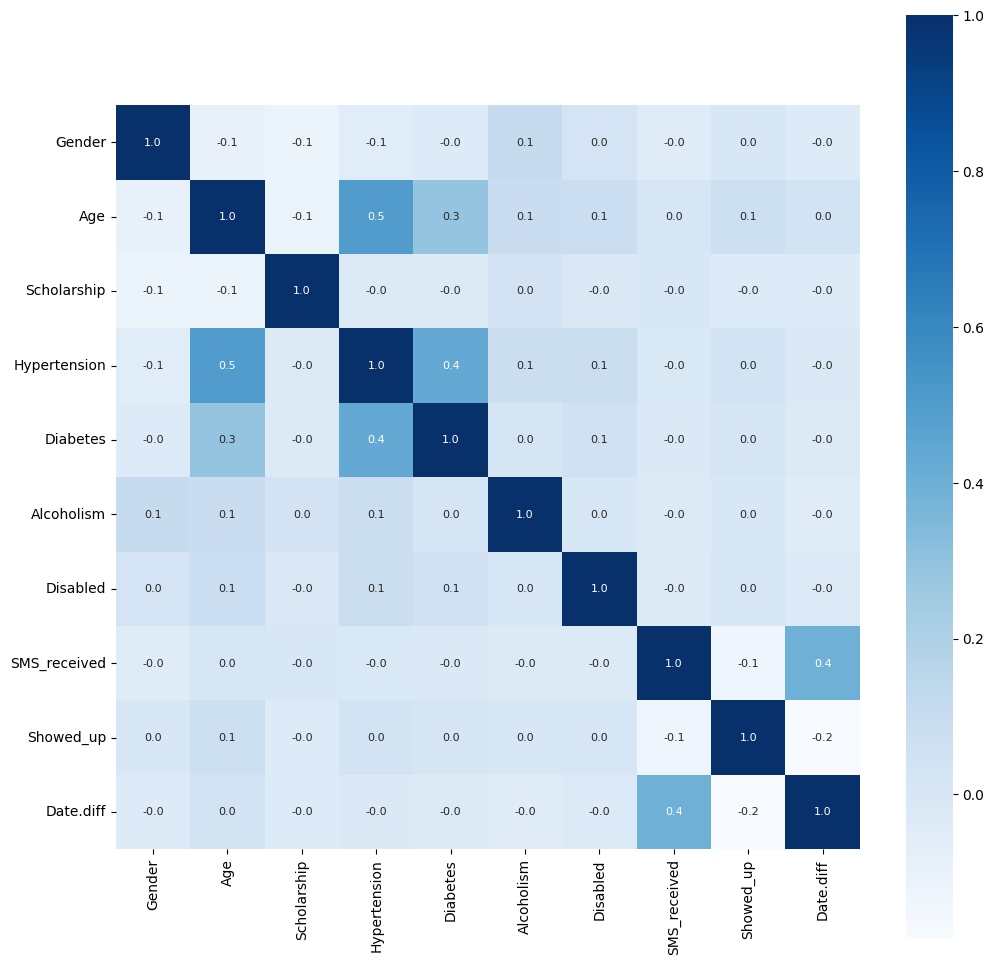

In [468]:
correlation=patient.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [469]:
patient.groupby('Showed_up').mean()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,Date.diff
Showed_up,,,,,,,,,
0,0.341546,35.329596,0.118616,0.174025,0.065975,0.031234,0.018685,0.441430,15.793403
1,0.345388,39.075187,0.096569,0.211343,0.076348,0.031451,0.021487,0.293258,8.737794


Splitting the Data

In [470]:
patient['Showed_up'].value_counts()

Showed_up
1    85307
0    21675
Name: count, dtype: int64

In [471]:
y=patient['Showed_up'].copy()
x=patient.drop('Showed_up',axis=1).copy()

x.iloc[78472]

Gender           0
Age             32
Scholarship      0
Hypertension     0
Diabetes         0
Alcoholism       0
Disabled         0
SMS_received     0
Date.diff        0
Name: 78477, dtype: int64

In [472]:
#scaler=StandardScaler()
#X=scaler.fit_transform(x)
X=x

In [473]:
# Stratified Train-Test Split to maintain the proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape

print(X_test)
print(y_test)
y_test[78472]



       Gender  Age  Scholarship  Hypertension  Diabetes  Alcoholism  Disabled  \
98536       1    8            0             0         0           0         0   
26546       0   38            1             0         0           0         0   
56995       0   39            0             0         0           0         0   
65610       0    3            0             0         0           0         0   
61866       0   56            0             1         0           0         0   
...       ...  ...          ...           ...       ...         ...       ...   
17166       0   33            0             0         0           0         0   
78472       0   41            1             0         0           0         0   
83530       1   33            0             0         0           0         0   
20294       1   33            0             0         0           0         0   
44719       1   75            0             0         0           0         0   

       SMS_received  Date.d

np.int64(0)

XGBoostClassifier can be configured and trained for a binary classification task with imbalanced data

Handles Imbalance,
Efficient Training: The combination of learning_rate, n_estimators ensures the model doesn’t overfit or train unnecessarily.
Robust Evaluation: AUC as the evaluation metric is highly effective for imbalanced datasets.

In [474]:
xgb = XGBClassifier(
    n_estimators=500,        # Number of trees (boosting rounds)
    learning_rate=0.1,       # Step size shrinkage for learning Controls the step size for updating weights during boosting iterations.
    # A lower value (e.g., 0.01) leads to slower but more robust learning, while higher values may train faster but can miss optimal solutions.
    max_depth=6,             # Depth of each tree
    scale_pos_weight=85307/21675,  # Ratio of majority to minority class The scale_pos_weight parameter ensures the model pays attention to the minority class.
    objective='binary:logistic',  # Binary classification objective,Specifies the task as binary classification with logistic regression at each leaf node.
    eval_metric='auc',       # Evaluation metric (AUC),Tracks AUC during training, a robust metric for imbalanced datasets.
    random_state=42,         # Ensures reproducibility
)

# Training the model
xgb.fit(
 X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Specifies training and validation datasets for monitoring performance during training.
                                                 #XGBoost will report metrics like AUC for both the train and test sets after each boosting round.
    verbose=100,             # Log progress every 100 rounds   
)

[0]	validation_0-auc:0.72926	validation_1-auc:0.72616
[100]	validation_0-auc:0.75056	validation_1-auc:0.73158
[200]	validation_0-auc:0.76220	validation_1-auc:0.72924
[300]	validation_0-auc:0.77047	validation_1-auc:0.72775
[400]	validation_0-auc:0.77596	validation_1-auc:0.72685
[499]	validation_0-auc:0.78183	validation_1-auc:0.72601


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

[[   24  4311]
 [   14 17048]]
98536    1
26546    1
56995    1
65610    1
61866    1
        ..
17166    1
78472    0
83530    1
20294    1
44719    1
Name: Showed_up, Length: 21397, dtype: int64
[1 1 1 ... 1 1 1]
[987, 1061, 1455, 1652, 2756, 3787, 4502, 4885, 6222, 6705, 7256, 8889, 9934, 10272, 10635, 10725, 10887, 10891, 11283, 12710, 13284, 13290, 13511, 14801, 15330, 15460, 16141, 16587, 16812, 17090, 17285, 17445, 19630, 19750, 20023, 20287, 20972, 21091]
Gender           1
Age             86
Scholarship      0
Hypertension     1
Diabetes         0
Alcoholism       0
Disabled         0
SMS_received     0
Date.diff       35
Name: 98841, dtype: int64


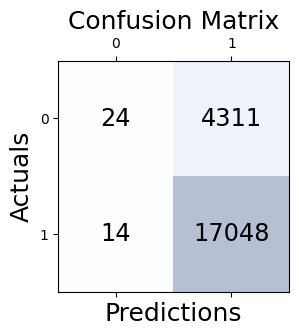

In [490]:
# Confusion_matrix

y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

print(y_test)
print(y_pred)
indices=[i for i, x in enumerate(y_pred) if x==0]
print(indices)
print(X_test.iloc[indices[0]])


In [476]:
# Classification_report
print(classification_report(y_test, y_pred))
print(y_test)
print(y_pred)


              precision    recall  f1-score   support

           0       0.63      0.01      0.01      4335
           1       0.80      1.00      0.89     17062

    accuracy                           0.80     21397
   macro avg       0.71      0.50      0.45     21397
weighted avg       0.76      0.80      0.71     21397

98536    1
26546    1
56995    1
65610    1
61866    1
        ..
17166    1
78472    0
83530    1
20294    1
44719    1
Name: Showed_up, Length: 21397, dtype: int64
[1 1 1 ... 1 1 1]


AUC: 0.7260144797919306


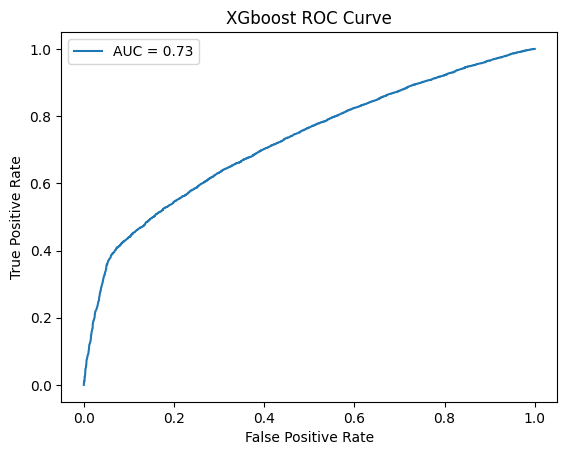

In [477]:

# ROC-AUC Curve:
y_prob = xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGboost ROC Curve")
plt.legend()
plt.show()

Random Forest is an ensemble learning method that uses multiple decision trees to improve classification performance.

[[3757  578]
 [8835 8227]]


Text(0.5, 1.0, 'Confusion Matrix')

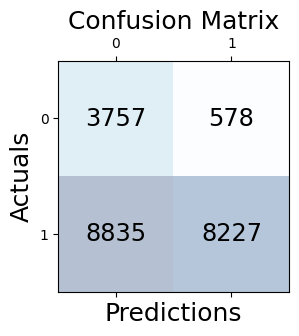

In [478]:
# Initialize the model
model = RandomForestClassifier(
    n_estimators=500,          # Number of trees
    max_depth=6,               # Depth of each tree
    class_weight={0: 4, 1: 1}, # Handle class imbalance
    random_state=42,           # Reproducibility
    n_jobs=-1                  # Use all CPU cores
)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)





In [479]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.87      0.44      4335
           1       0.93      0.48      0.64     17062

    accuracy                           0.56     21397
   macro avg       0.62      0.67      0.54     21397
weighted avg       0.81      0.56      0.60     21397



AUC: 0.73


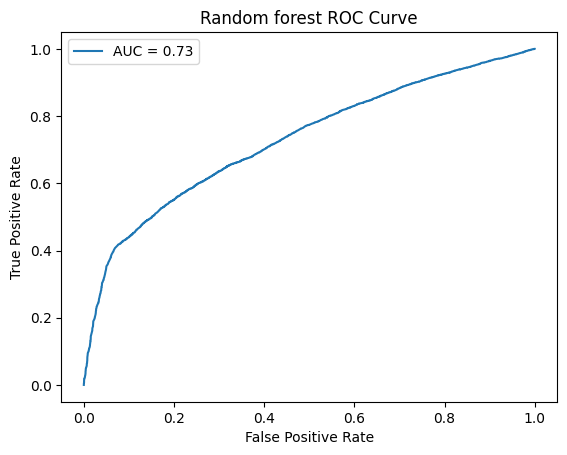

In [480]:
# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random forest ROC Curve")
plt.legend()
plt.show()

In [481]:


# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [4, 6, 8],
    'class_weight': [{0: 4, 1: 1}, {0: 5, 1: 1}, 'balanced']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_

Best Parameters: {'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 500}


Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem. It is simple, efficient, and particularly useful for classification tasks with high-dimensional data

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.13      0.19      4335
           1       0.81      0.93      0.87     17062

    accuracy                           0.77     21397
   macro avg       0.57      0.53      0.53     21397
weighted avg       0.71      0.77      0.73     21397

AUC: 0.63


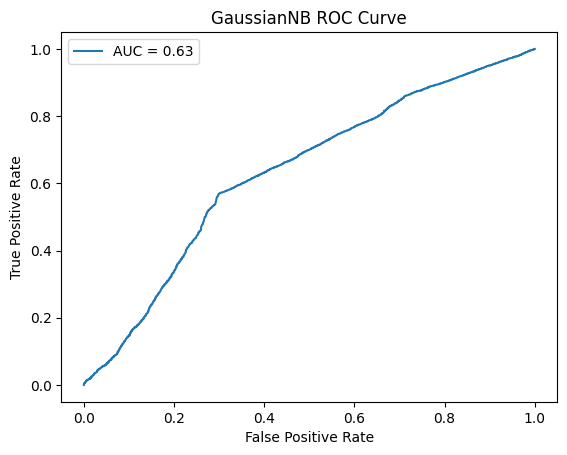

In [482]:
# Initialize the model
model = GaussianNB()

# Fit the model
#model.fit(X_train, y_train)
model = GaussianNB(priors=[0.2, 0.8])  # Set priors based on class proportions,Naive Bayes does not have built-in methods to handle imbalanced data like class weighting.Alternatively, you can modify the prior probabilities manually.
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GaussianNB ROC Curve")
plt.legend()
plt.show()

Decision Tree Classifier builds a tree-like model of decisions based on feature splits to classify data points.

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.79      0.44      4335
           1       0.91      0.55      0.68     17062

    accuracy                           0.60     21397
   macro avg       0.61      0.67      0.56     21397
weighted avg       0.79      0.60      0.64     21397

AUC: 0.7240487876699633


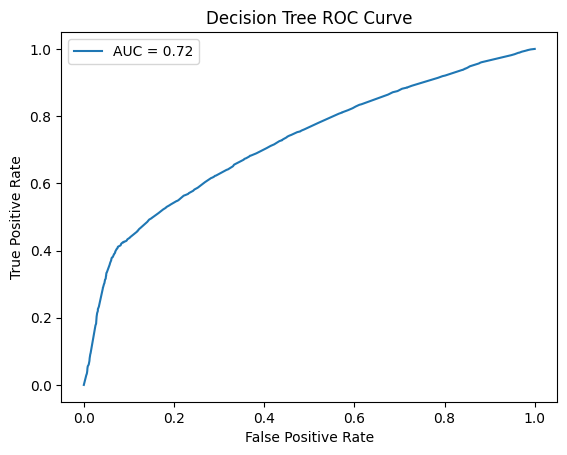

In [483]:

# Initialize the model
model = DecisionTreeClassifier(
    class_weight={0: 4, 1: 1},  # Handle class imbalance
    max_depth=10,               # Limit tree depth to prevent overfitting
    min_samples_leaf=10,        # Minimum samples in a leaf node
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC and ROC Curve
#auc = roc_auc_score(y_test, y_prob)
#print(f"AUC: {auc:.2f}")

#plot_roc_curve(model, X_test, y_test)
#plt.show()

# ROC-AUC Curve:
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()


Cross-validation of the models help evaluate and compare models while minimizing the risk of overfitting. 
It involves splitting the dataset into multiple folds and using each fold as a validation set while the others serve as the training set. 

In [484]:

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(class_weight={0: 4, 1: 1}, max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight={0: 4, 1: 1}, n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=85000/21000, eval_metric='auc', random_state=42),
    'Naive Bayes': GaussianNB(priors=[0.2, 0.8])
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 
# 
#  scorer for ROC-AUC
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, scoring=scorer, cv=skf)
    results[model_name] = scores
    print(f"{model_name} - Mean AUC: {scores.mean():.4f}, Std: {scores.std():.4f}")


c:\Users\aggal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Decision Tree - Mean AUC: 0.7188, Std: 0.0017
Random Forest - Mean AUC: 0.6343, Std: 0.0058
XGBoost - Mean AUC: 0.7272, Std: 0.0025
Naive Bayes - Mean AUC: 0.6338, Std: 0.0039


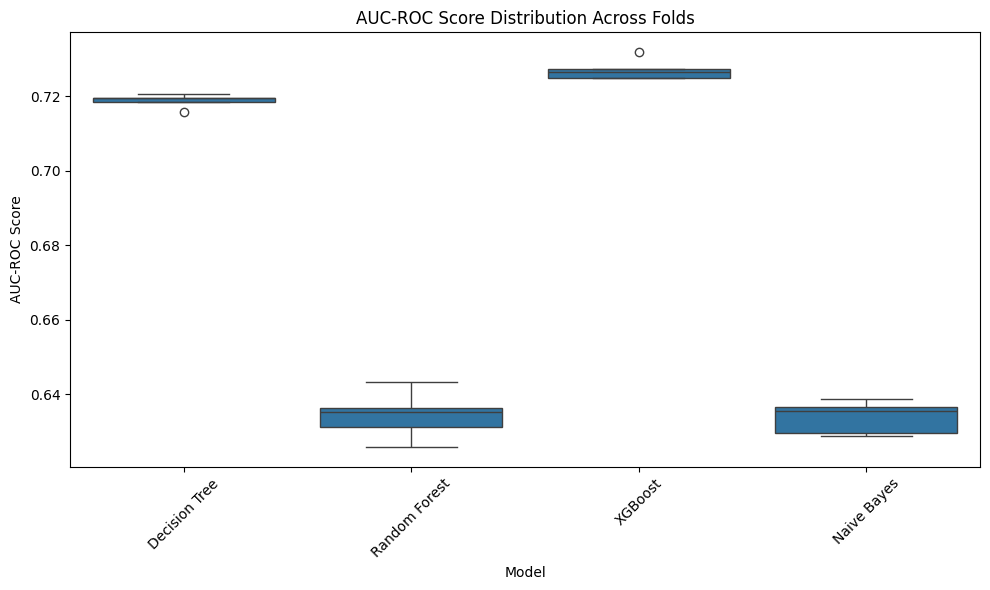

In [485]:
# Prepare data for visualization
results_list = [(model, fold, score) for model, scores in results.items() for fold, score in enumerate(scores, 1)]

# Convert to structured format for seaborn
results_df = pd.DataFrame(results_list, columns=["Model", "Fold", "AUC"])

# Visualize the results

# 1. Box Plot for Distribution Across Folds
plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="AUC", data=results_df)
plt.title("AUC-ROC Score Distribution Across Folds")
plt.ylabel("AUC-ROC Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





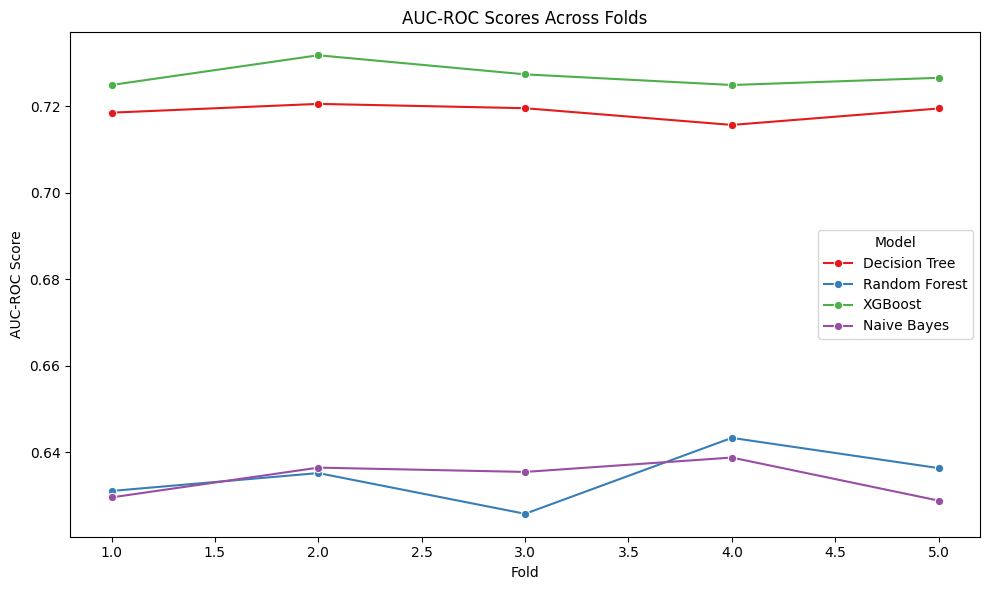

In [486]:
# 2. Line Plot for Performance Across Folds
plt.figure(figsize=(10, 6))
sns.lineplot(x="Fold", y="AUC", hue="Model", data=results_df, marker="o", palette="Set1")
plt.title("AUC-ROC Scores Across Folds")
plt.ylabel("AUC-ROC Score")
plt.xlabel("Fold")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

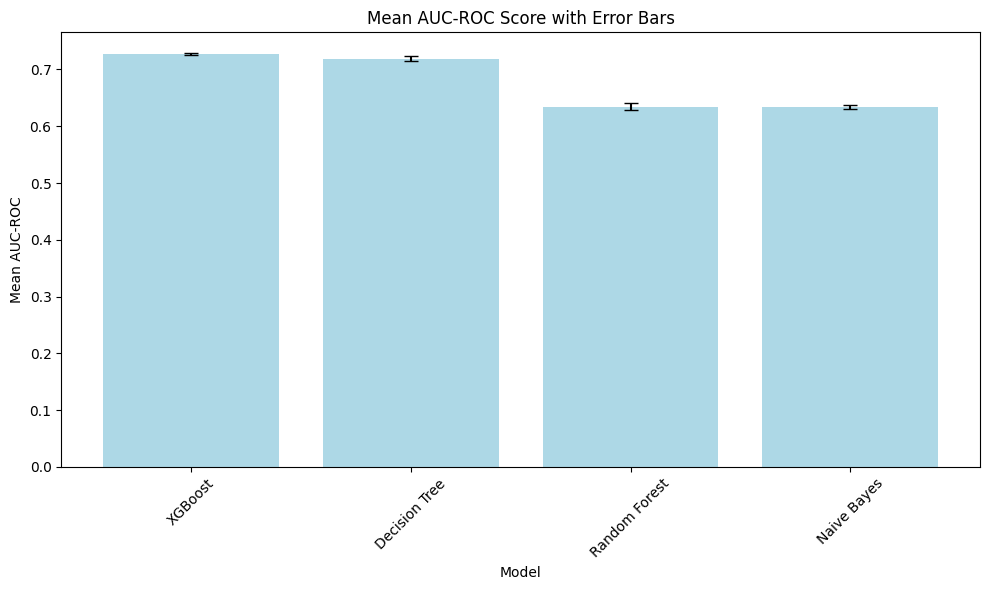

In [487]:
# 3. Bar Plot for Mean AUC Scores
mean_auc = results_df.groupby("Model")["AUC"].mean().sort_values(ascending=False)
std_auc = results_df.groupby("Model")["AUC"].std()

plt.figure(figsize=(10, 6))
plt.bar(mean_auc.index, mean_auc.values, yerr=std_auc.values, capsize=5, color='lightblue')
plt.title("Mean AUC-ROC Score with Error Bars")
plt.ylabel("Mean AUC-ROC")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [488]:
print("Patient show_up  PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")
Gender = int(input("Enter the patient gender 1for m and 0 for female ? "))
Age = int(input("Enter the patient age ? "))
Scholarship = int(input("Does the patient have Scholarship ? "))
Hypertension = int(input("Does the patient have Hypertension ? "))
Diabetes = int(input("Does the patient Diabetes ? ")) 
Alcoholism = int(input("Does the patient have any record of Alcoholism ? ")) 
Disabled = int(input("IS the patient Disabled ? ")) 
SMS_received = int(input("Did the patient receive SMS ? "))
Datediff = int(input("No of days between schedule day and appointment day i,e. Date.diff ? "))

patient = [[Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,Datediff]]
result = xgb.predict(patient)
print("\nResults : ",result)

if result == 1:
    print(result,': There is a chance of 70% that this patient might show_up')
    print()
else :
    print(result, ': There is a chance of  70% that this patient might not show_up')
    print()

Patient show_up  PREDICTION BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No



Results :  [0]
[0] : There is a chance of  70% that this patient might not show_up

